In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
835,4250-WAROZ,Male,1,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.25,5774.55,No
480,0486-LGCCH,Male,0,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,225.75,No
5198,0643-OKLRP,Female,1,Yes,No,47,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.35,3825.85,Yes
3456,0436-TWFFZ,Female,0,No,No,67,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,85.25,5714.2,No
2233,8097-VBQTZ,Male,0,No,No,54,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.90,3883.3,No


In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
df.iloc[488].TotalCharges

' '

In [17]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [18]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12602/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [21]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [22]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


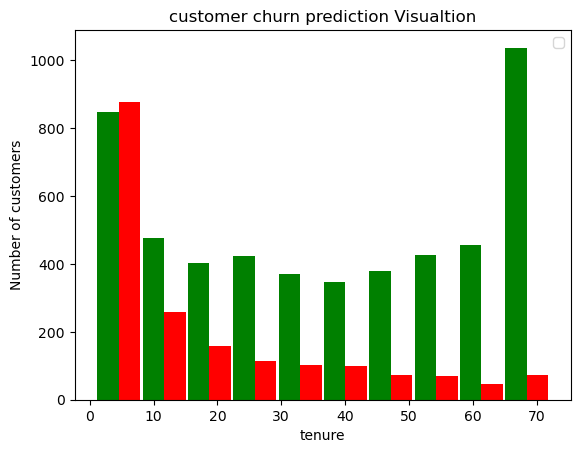

In [23]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel("Number of customers")
plt.title("customer churn prediction Visualtion")
plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=0.95,color=['green','red'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


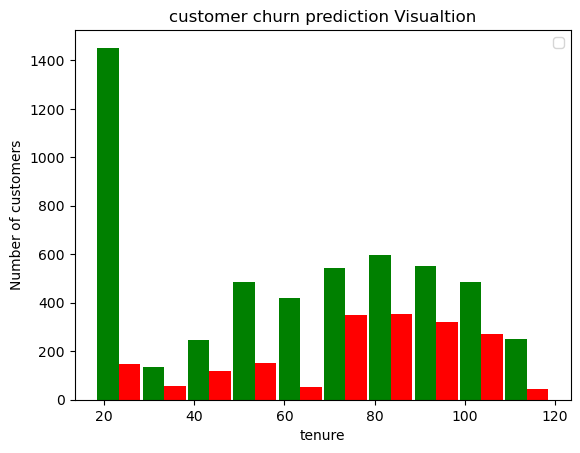

In [24]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('tenure')
plt.ylabel("Number of customers")
plt.title("customer churn prediction Visualtion")
plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=0.95,color=['green','red'])
plt.legend()

In [25]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [26]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
df1.replace("No phone service",'No',inplace=True)
df1.replace("No internet service",'No',inplace=True)


/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12602/379532339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service",'No',inplace=True)
/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12602/379532339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service",'No',inplace=True)


In [28]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12602/1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [30]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12602/698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [32]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [34]:
for cols in df2:
    print(f'{col}:{df2[col].unique()}')

Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]
Churn:[0 1]


In [35]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 528us/step - loss: 0.5405 - accuracy: 0.7090
Epoch 2/100
176/176 [==============================] - 0s 475us/step - loss: 0.4287 - accuracy: 0.7913
Epoch 3/100
176/176 [==============================] - 0s 482us/step - loss: 0.4201 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 0s 469us/step - loss: 0.4153 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 468us/step - loss: 0.4117 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 470us/step - loss: 0.4095 - accuracy: 0.8064
Epoch 7/100
176/176 [==============================] - 0s 483us/step - loss: 0.4070 - accuracy: 0.8108
Epoch 8/100
176/176 [==============================] - 0s 491us/step - loss: 0.4066 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 0s 475us/step - loss: 0.4048 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 0s 486us/step - l

176/176 [==============================] - 0s 532us/step - loss: 0.3544 - accuracy: 0.8306
Epoch 80/100
176/176 [==============================] - 0s 544us/step - loss: 0.3539 - accuracy: 0.8300
Epoch 81/100
176/176 [==============================] - 0s 510us/step - loss: 0.3543 - accuracy: 0.8284
Epoch 82/100
176/176 [==============================] - 0s 488us/step - loss: 0.3526 - accuracy: 0.8315
Epoch 83/100
176/176 [==============================] - 0s 493us/step - loss: 0.3536 - accuracy: 0.8318
Epoch 84/100
176/176 [==============================] - 0s 487us/step - loss: 0.3522 - accuracy: 0.8332
Epoch 85/100
176/176 [==============================] - 0s 523us/step - loss: 0.3526 - accuracy: 0.8295
Epoch 86/100
176/176 [==============================] - 0s 497us/step - loss: 0.3522 - accuracy: 0.8297
Epoch 87/100
176/176 [==============================] - 0s 496us/step - loss: 0.3521 - accuracy: 0.8318
Epoch 88/100
176/176 [==============================] - 0s 606us/step - loss:

In [40]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 414us/step


array([[0.13661672],
       [0.5038271 ],
       [0.01103373],
       [0.94362545],
       [0.33961025]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(95.72222222222221, 0.5, 'Truth')

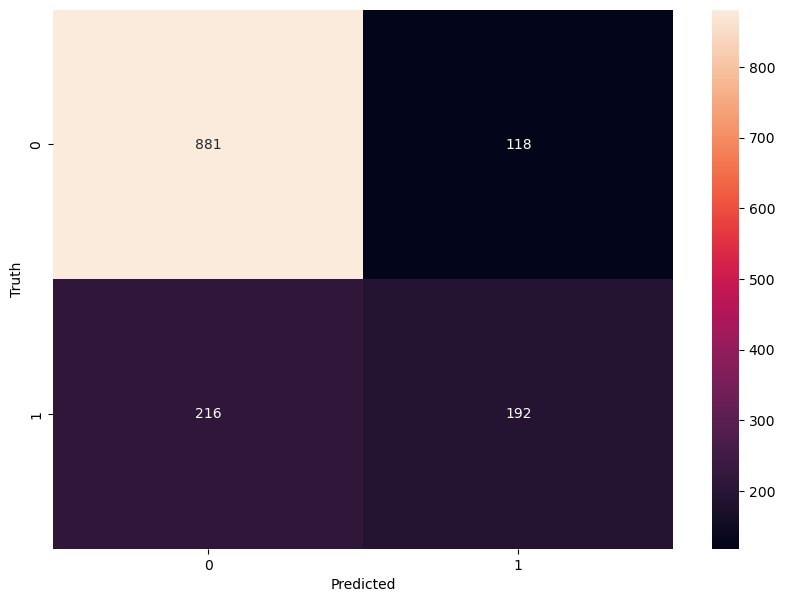

In [44]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')